In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
import scipy.stats as stats
import pylab
from arch import arch_model

C:\Users\Hiroki\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [26]:
kw_df = pd.read_csv("juyo-2018.csv", names=['DATE','TIME','実績'])

In [52]:
tmp = kw_df[5088:5424]

In [195]:
x=tmp['実績']

In [89]:
ts_acf = sm.tsa.stattools.acf( x, nlags = 336 ) # 自己相関関数

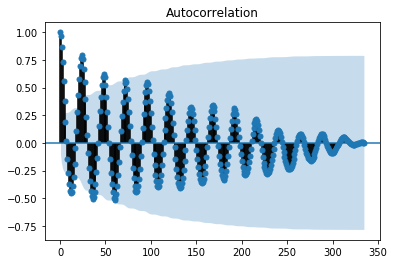

In [94]:
sm.graphics.tsa.plot_acf( x, lags = 335 );

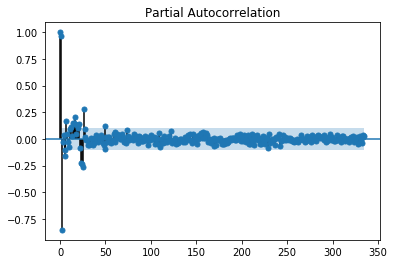

In [95]:
sm.graphics.tsa.plot_pacf( x, lags = 335 );

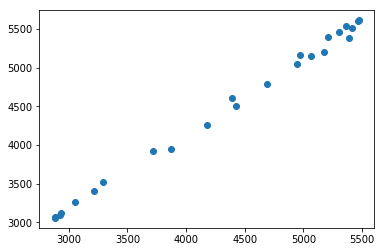

In [106]:
plt.scatter(x[0:24],x[24:48])

In [61]:
tmp['DATE']=pd.date_range('2018-08-01 00:00', periods=336, freq='H')

C:\Users\Hiroki\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [163]:
tmp=tmp.drop("TIME", axis=1)

In [168]:
tmp=tmp.set_index('DATE')

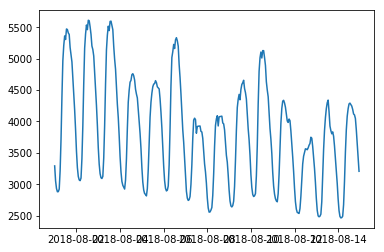

In [193]:
plt.plot(tmp['実績'] )
plt.show()

In [170]:
res = sm.tsa.seasonal_decompose(np.r_[x], freq=24)

(-1000, 1000)

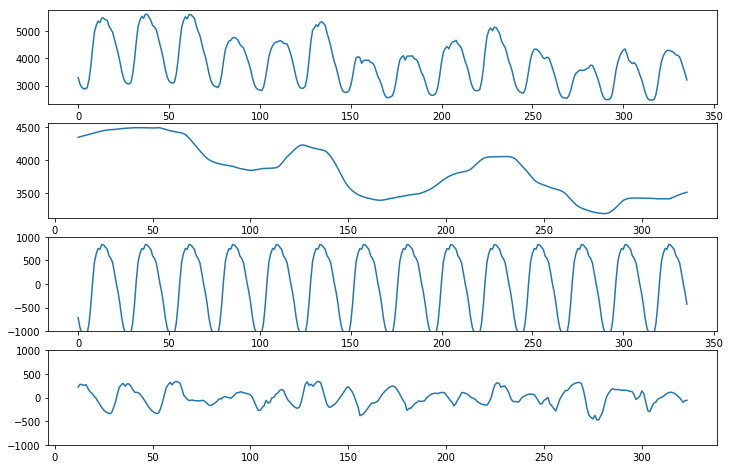

In [171]:
plt.figure(figsize=(12, 8)) 

plt.subplot(4,1,1); plt.plot( res.observed )

plt.subplot(4,1,2); plt.plot( res.trend );

plt.subplot(4,1,3); plt.plot( res.seasonal ); plt.ylim(-1000, 1000)

plt.subplot(4,1,4); plt.plot( res.resid ); plt.ylim(-1000, 1000)



In [241]:
sarimax_mod17 = sm.tsa.statespace.SARIMAX(np.c_[x], trend='c', order=(12,0,3),seasonal_order=(1,1,1,24),enforce_stationarity = True, enforce_invertibility = False)

In [242]:
sarimax_res17 = sarimax_mod17.fit()

C:\Users\Hiroki\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [247]:
pred = sarimax_res17.predict(0,600)

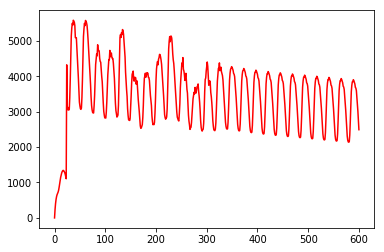

In [248]:
#plt.plot(x)
plt.plot(pred, "r")

## 参考文献
[Pythonで時系列分析の練習（9）SARIMAモデルで未来予測](https://momonoki2017.blogspot.com/2018/03/python9sarima.html)

[Tips_02:時系列データ分析SARIMAモデル 「学習データのinputについて」【statsmodels](https://qiita.com/snuow/items/ec25ae9d7d692cba1333)

[TV朝日の視聴率推移をSARIMAモデルで予測してみる](https://qiita.com/mshinoda88/items/749131478bfefc9bf365)

[SARIMAで時系列データの分析（PV数の予測）](https://www.kumilog.net/entry/sarima-pv)